## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

/var/folders/27/qjg_wpwd1pn4vm80vy6njqmw0000gn/T/ipykernel_71457/342189491.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


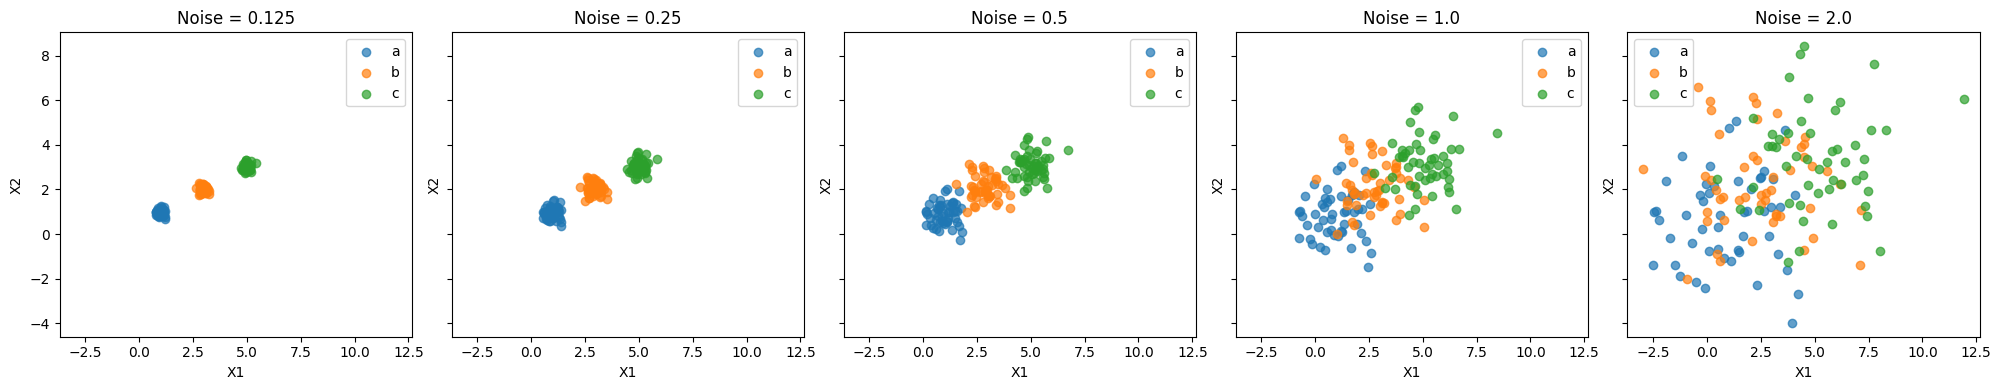

In [ ]:
import matplotlib.pyplot as plt

# List of datasets with corresponding noise values
datasets = [
    (0.125, df0_125),
    (0.25, df0_25),
    (0.5, df0_5),
    (1.0, df1_0),
    (2.0, df2_0)
]

# Create a figure with 5 subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

# Iterate through each dataset and plot the groups in a separate subplot
for ax, (noise, df) in zip(axes, datasets):
    # Plot each group with a different color
    for group, group_df in df.groupby("group"):
        ax.scatter(group_df['x1'], group_df['x2'], label=group, alpha=0.7)
    ax.set_title(f"Noise = {noise}")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.legend()

plt.tight_layout()
plt.show()


The visual distinctness increases with these clusters as the noise increases. When the noise is smaller, a,b,c are grouped tightly together but when noise is higher, it creates a more distinct scatterplot where you can see exact plots.


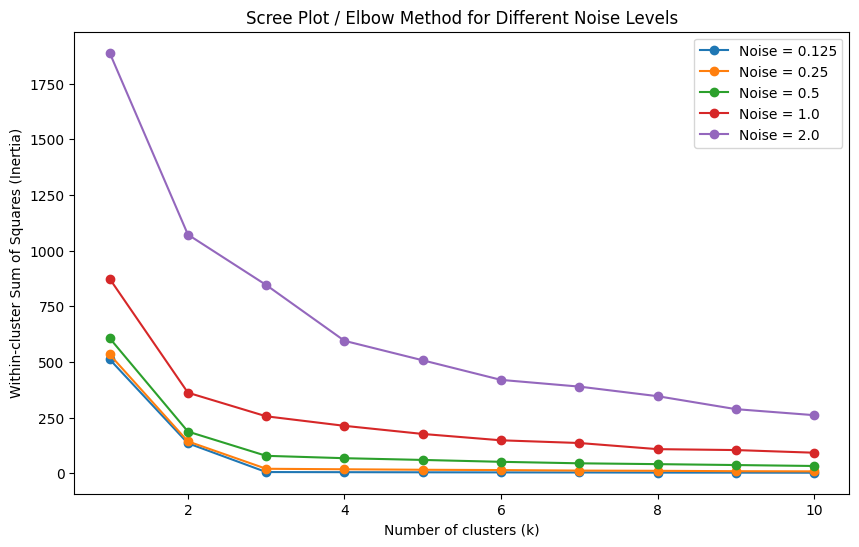

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of k values to test
ks = range(1, 11)

# Prepare the datasets with their noise values
datasets = [
    (0.125, df0_125),
    (0.25, df0_25),
    (0.5, df0_5),
    (1.0, df1_0),
    (2.0, df2_0)
]

plt.figure(figsize=(10, 6))

# Compute and plot the inertia for each dataset
for noise, df in datasets:
    inertia = []
    X = df[['x1', 'x2']].values
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.plot(ks, inertia, marker='o', label=f"Noise = {noise}")

plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster Sum of Squares (Inertia)")
plt.title("Scree Plot / Elbow Method for Different Noise Levels")
plt.legend()
plt.show()


Increasing noise level shifts the curves upward and makes them flatter. Lower noise levels make the data more tightly clustered, which causes there to be a steeper drop for $k$, which creates a clear elbow. At larger noise, it is harder to pinpoint a single best $k$ because the scree curve does not exhibit a sharp bend. 

The elbow relies on the observation of how the increasing number of clusters causes the total within-cluster sum of squares to decrease at what rate. This is known as inertia. When you plot inertia versus $k$, this transition from a steep drop to a more gradual slope appears visually like an elbow. 

At low noise there's a sharp decrease in inertia when moving from k=1 to the true cluster count. The bend in the scree plot suggests a clear 'best' k. Once you have more clusters, the high‐noise curve tends to flatten out, making a definitive elbow less obvious than it might look at first glance.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [ ]:
import pandas as pd 

df = pd.read_csv('/Users/kimberlyliu/Downloads/DS 3001/clustering/assignment/data/2022 election cycle fundraising.csv')
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [ ]:
# Remove dollar signs and commas, then convert to numeric
df['Raised'] = df['Raised'].replace({'$': '', ',': ''}, regex=True).astype(float)
df['Spent'] = df['Spent'].replace({'$': '', ',': ''}, regex=True).astype(float)
df['Cash on Hand'] = df['Cash on Hand'].replace({'$': '', ',': ''}, regex=True).astype(float)
df['Debts'] = df['Debts'].replace({'$': '', ',': ''}, regex=True).astype(float)

df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


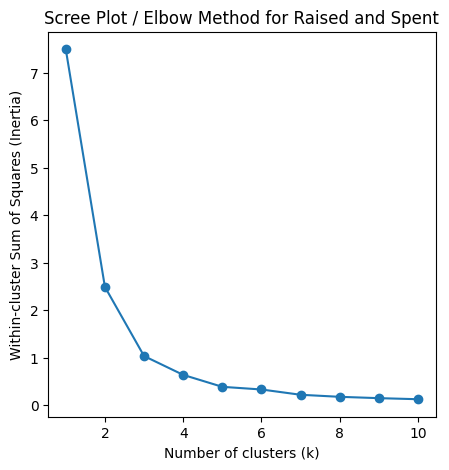

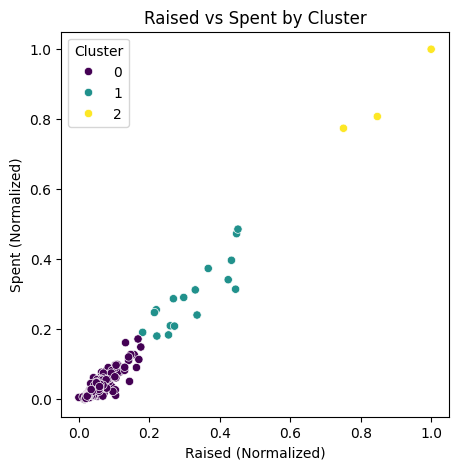

Politicians in Cluster 2:
              Member       Party    State    Raised     Spent
340       Mark Kelly  Democratic  Arizona  0.847210  0.807760
417  Raphael Warnock  Democratic  Georgia  1.000000  1.000000
523      Val Demings  Democratic  Florida  0.751061  0.774181

Politicians in Cluster 1:
                     Member       Party           State    Raised     Spent
2               Adam Schiff  Democratic      California  0.254404  0.183753
87   Catherine Cortez Masto  Democratic          Nevada  0.447666  0.472999
89            Chuck Schumer  Democratic        New York  0.423863  0.341554
115            Dan Crenshaw  Republican           Texas  0.181001  0.191054
261            John Kennedy  Republican       Louisiana  0.335412  0.240608
290            Katie Porter  Democratic      California  0.259505  0.209938
298          Kevin McCarthy  Republican      California  0.297585  0.290764
326           Maggie Hassan  Democratic   New Hampshire  0.367193  0.373632
328            

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib.pyplot as plt

# Normalize the 'Raised' and 'Spent' columns
scaler = MinMaxScaler()
df[['Raised', 'Spent']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Determine the optimal number of clusters using a scree plot
ks = range(1, 11)
inertia = []

X = df[['Raised', 'Spent']].values
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(5, 5))
plt.plot(ks, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster Sum of Squares (Inertia)")
plt.title("Scree Plot / Elbow Method for Raised and Spent")
plt.show()

# Fit KMeans with the optimal number of clusters (let's assume it's 3 for this example)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot of Raised against Spent, colored by cluster membership
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', palette='viridis')
plt.title("Raised vs Spent by Cluster")
plt.xlabel("Raised (Normalized)")
plt.ylabel("Spent (Normalized)")
plt.legend(title='Cluster')
plt.show()

# Identify the politicians in the smallest two clusters
cluster_sizes = df['Cluster'].value_counts().sort_values()
smallest_clusters = cluster_sizes.index[:2]

for cluster in smallest_clusters:
    print(f"Politicians in Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][['Member', 'Party', 'State', 'Raised', 'Spent']])
    print()

The Scree plot shows the inertia against num of clusters $k$. We should choose $k=3$ because thats where the elbow stops decreasing dramatically and levels off. The Scatterplot with normalizatoin shows that cluster group 0 is the largest group and mostly in the lower-left portion. Yellow dots (group 2) are my outliers. 

The smallest clusters are cluster 1 and 2. In cluster 2 there are only 3 politicians, Mark Kelly of AZ, Raphael Warnock of GA, and Val Demings of FL. Their raised/spent is super high with Val Demings spending more than he raised. 

Cluster 1 is a bit larger with representatives from California, New York, Ohio, South Carolina, and more. Their raised/spent values are still relatively high compared to the majority but theyre not as prominent as the top outliers in Cluster 2. 

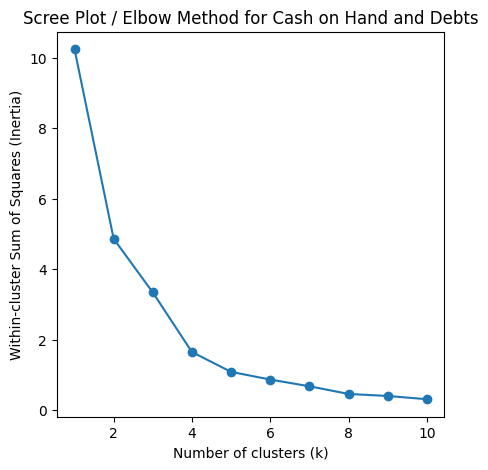

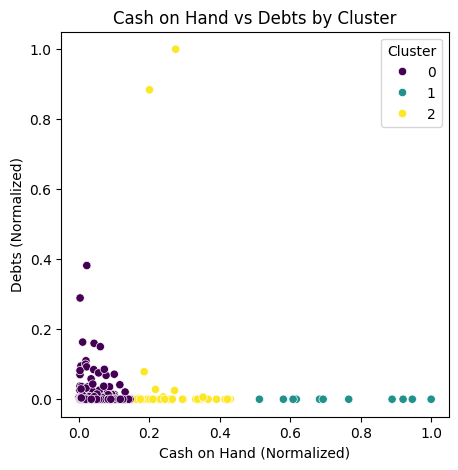

Politicians in Cluster 1:
                  Member       Party           State  Cash on Hand  Debts
2            Adam Schiff  Democratic      California      0.920268    0.0
89         Chuck Schumer  Democratic        New York      0.889092    0.0
261         John Kennedy  Republican       Louisiana      0.683153    0.0
267           John Thune  Republican    South Dakota      0.765940    0.0
274      Josh Gottheimer  Democratic      New Jersey      0.617185    0.0
290         Katie Porter  Democratic      California      0.693338    0.0
310       Lindsey Graham  Republican  South Carolina      0.608044    0.0
340           Mark Kelly  Democratic         Arizona      0.580473    0.0
412  Raja Krishnamoorthi  Democratic        Illinois      0.512454    0.0
417      Raphael Warnock  Democratic         Georgia      1.000000    0.0
500            Tim Scott  Republican  South Carolina      0.946418    0.0

Politicians in Cluster 2:
                       Member        Party          State  

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Normalize the 'Cash on Hand' and 'Debts' columns
scaler = MinMaxScaler()
df[['Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

# 2. Determine the optimal number of clusters (Scree Plot)
ks = range(1, 11)
inertia = []

X = df[['Cash on Hand', 'Debts']].values
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(5, 5))
plt.plot(ks, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster Sum of Squares (Inertia)")
plt.title("Scree Plot / Elbow Method for Cash on Hand and Debts")
plt.show()

# 3. Choose an optimal k from the scree plot (assume 3 again as an example)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
df['Cluster_CH_Debts'] = kmeans.fit_predict(X)

# 4. Scatter plot of Cash on Hand vs Debts, colored by cluster
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster_CH_Debts', palette='viridis')
plt.title("Cash on Hand vs Debts by Cluster")
plt.xlabel("Cash on Hand (Normalized)")
plt.ylabel("Debts (Normalized)")
plt.legend(title='Cluster')
plt.show()

# 5. Identify the politicians in the smallest two clusters
cluster_sizes = df['Cluster_CH_Debts'].value_counts().sort_values()
smallest_clusters = cluster_sizes.index[:2]

for cluster in smallest_clusters:
    print(f"Politicians in Cluster {cluster}:")
    print(df[df['Cluster_CH_Debts'] == cluster][['Member', 'Party', 'State', 'Cash on Hand', 'Debts']])
    print()


In our Scree plot, the best $k$ value is $4$ because that is where the drop off levels off. 

The smallest clusters are cluster 1 and 2 and there is a larger variance in these than that of cluster 0. 

Noticeably, Chuck Shumer appears in both of these smallest clusters in both analyses of Cash on Hand vs Debts and Raised vs Spent. A lot of the other politicans from Raised vs Spent do not appear on the smallest clusters of Cash vs Debts. 

Reasons for this could be that a candidate who raises and spends a lot, placing them in a top cluster, might still have modest cash on hand if they poured most of it into the campaign. Debts also reflect whether a campaign borrowed money to keep afloat which might not always align with how much they raised and spent. The clusters for Raised/Spent can reflect campaign activity and race competitiveness  which Cash on Hand/Debts can reflect longer-term financial posiitons, prior to fundraising. 

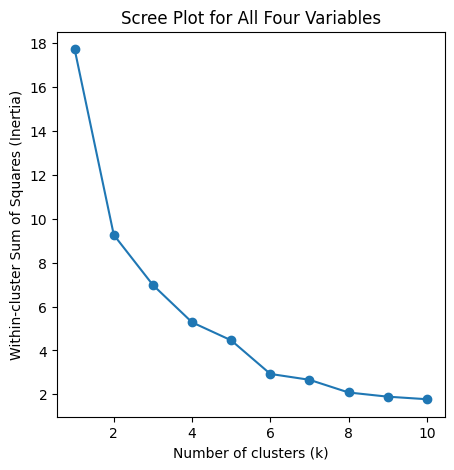

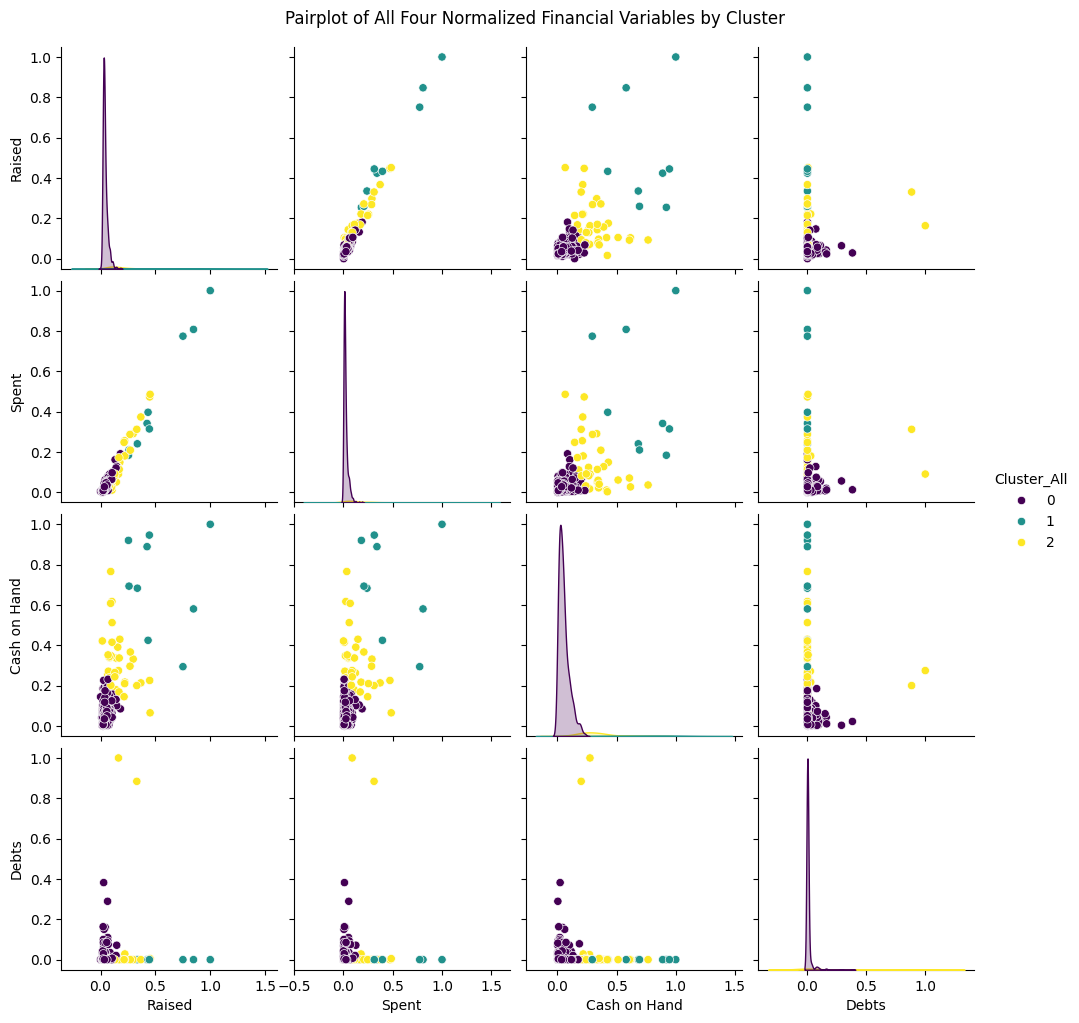

Politicians in Cluster 2:
                       Member        Party           State    Raised  \
11               Alex Padilla   Democratic      California  0.143690   
12   Alexandria Ocasio-Cortez   Democratic        New York  0.144517   
45             Bernie Sanders  Independent         Vermont  0.175760   
87     Catherine Cortez Masto   Democratic          Nevada  0.447666   
100          Chrissy Houlahan   Democratic    Pennsylvania  0.065991   
112               Cory Booker   Democratic      New Jersey  0.081631   
133               David Trone   Democratic        Maryland  0.163436   
232               Jerry Moran   Republican          Kansas  0.071240   
239                Jim Jordan   Republican            Ohio  0.156915   
247               Joe Manchin   Democratic   West Virginia  0.104317   
267                John Thune   Republican    South Dakota  0.092727   
274           Josh Gottheimer   Democratic      New Jersey  0.103522   
276               Josh Hawley   Republ

In [17]:
## k-means clustering for all variables 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume df is already loaded and cleaned
# Normalize all four numeric variables
scaler = MinMaxScaler()
cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df_norm = df.copy()  # Work on a copy so we don't overwrite previous normalizations
df_norm[cols] = scaler.fit_transform(df_norm[cols])

# Determine the optimal number of clusters using a scree plot
ks = range(1, 11)
inertia_all = []
X_all = df_norm[cols].values

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X_all)
    inertia_all.append(kmeans.inertia_)

plt.figure(figsize=(5, 5))
plt.plot(ks, inertia_all, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster Sum of Squares (Inertia)")
plt.title("Scree Plot for All Four Variables")
plt.show()

# For illustration, assume the optimal k appears to be 3 (you can adjust based on the plot)
optimal_k_all = 3
kmeans_all = KMeans(n_clusters=optimal_k_all, random_state=100)
df_norm['Cluster_All'] = kmeans_all.fit_predict(X_all)

# For visualization, we can use a pairplot to see the clustering across the four dimensions:
sns.pairplot(df_norm, vars=cols, hue='Cluster_All', palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot of All Four Normalized Financial Variables by Cluster", y=1.02)
plt.show()

# Identify politicians in Cluster 2
cluster_label = 2
politicians_cluster_2 = df_norm[df_norm['Cluster_All'] == cluster_label]

# Print their names and any other columns of interest
print("Politicians in Cluster 2:")
print(politicians_cluster_2[['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])


Immediately, I noticed in the scree plot, the dropoff for $k$ is much higher at approximately $k=5$. The cluster scatterplots are also different from those we've seen before. They are more uniform and have a lot less outliers in clusters. The clustering of all the variables helps include the flow of money through Raised/Spent and the current snapshot (Cash/Debts). This gives more of a complete picture of the campaign's overall financial strategy and health. 

The $k$-means clustering algorithm revealed some useful patterns in the data. The clustering differentiated campaigns with higher activity and cash flow than those with lower activty. By analyzing all 4 variables together, I was able to see some nuanced profiles. Some campaigns had high spending but still had healthy cash reserves. There were still a few outliers that remained that could be further analyzed to see if it was due to a speciic race that caused high spending. The outliers can be representative of exceptionally competitive races. The $k$-means clustering showed a structured way to interpret the campaign finance data.  